In [204]:
# https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
    
# previous dataset: 07 August, 2016
# this dataset: 18 February, 2017
# next dataset: 17 April, 2018

"""
based on min/max first/last review, the dataset covers up to and including Feb 2017
"""

'\nbased on min/max first/last review, the dataset covers up to and including Feb 2017\n'

In [205]:
# !pip install sklearn

In [206]:
import pandas as pd
import csv
from sklearn import preprocessing
import pprint
from datetime import datetime
import re

pd.set_option('display.max_columns', 94)

In [207]:
# %cd ../../data/airbnbdata
!ls

201702_calendar.csv.gz	      201702_reviews.csv	 201811_reviews.csv
201702_listings.csv	      201702_reviews.csv.gz	 201811_reviews.csv.gz
201702_listings.csv.gz	      201811_calendar.csv.gz	 column_names.txt
201702_listings_geocoded.csv  201811_listings.csv	 geo
201702_listings_preproc.csv   201811_listings.csv.gz	 housing
201702_neighbourhoods.csv     201811_neighbourhoods.csv


In [208]:
filename = '201702_listings.csv.gz' # 94 cols
filename = '201702_listings_preproc.csv' # 15 cols

df_read = pd.read_csv(filename,
                       encoding='utf-8',
#                        compression='gzip',
                       sep=',',
                       index_col = 0,
                       header=0
                       )

print(df_read.shape)
# df_read.head(1)
# sorted(df_read.columns.tolist())

(5376, 93)


In [209]:
df = (df_read[['host_id', 
              'host_total_listings_count',
              'host_since',
              'first_review','last_review', 'number_of_reviews',
              'last_scraped',
              'minimum_nights',
              'property_type',
              'price']].copy())

# remove listings without reviews
df = df[df.number_of_reviews>0]


df.head()
# df.isnull().sum() # 1001 missing first/last review
# df.shape

,host_id,host_total_listings_count,host_since,first_review,last_review,number_of_reviews,last_scraped,minimum_nights,property_type,price
listing_url,,,,,,,,,,
https://www.airbnb.com/rooms/14348712,77493883,1,2016-06-13,2016-09-05,2016-09-23,5,2017-02-18,2,Apartment,75.0
https://www.airbnb.com/rooms/15749806,91978152,1,2016-08-26,2016-11-14,2016-11-28,2,2017-02-18,3,Townhouse,69.0
https://www.airbnb.com/rooms/9602076,13513639,2,2014-03-25,2016-03-31,2016-10-28,10,2017-02-18,2,House,140.0
https://www.airbnb.com/rooms/15952233,103567560,2,2016-11-13,2016-11-27,2017-02-17,17,2017-02-18,1,Apartment,129.0
https://www.airbnb.com/rooms/14737754,9998968,7,2013-11-13,2016-09-05,2017-02-12,25,2017-02-18,3,Apartment,124.0


In [210]:
# convert to Date Format

df[['first_review', 'last_review', 'last_scraped']] = (df_sub[['first_review', 
                                                                   'last_review', 
                                                                   'last_scraped']].apply(pd.to_datetime, format='%Y-%m-%d'))
# df.info()

In [211]:
df['last_review_since_scraped'] = (df.last_scraped - df.last_review).astype('timedelta64[M]')
df.head()

,host_id,host_total_listings_count,host_since,first_review,last_review,number_of_reviews,last_scraped,minimum_nights,property_type,price,last_review_since_scraped
listing_url,,,,,,,,,,,
https://www.airbnb.com/rooms/14348712,77493883,1,2016-06-13,2016-09-05,2016-09-23,5,2017-02-18,2,Apartment,75.0,4.0
https://www.airbnb.com/rooms/15749806,91978152,1,2016-08-26,2016-11-14,2016-11-28,2,2017-02-18,3,Townhouse,69.0,2.0
https://www.airbnb.com/rooms/9602076,13513639,2,2014-03-25,2016-03-31,2016-10-28,10,2017-02-18,2,House,140.0,3.0
https://www.airbnb.com/rooms/15952233,103567560,2,2016-11-13,2016-11-27,2017-02-17,17,2017-02-18,1,Apartment,129.0,0.0
https://www.airbnb.com/rooms/14737754,9998968,7,2013-11-13,2016-09-05,2017-02-12,25,2017-02-18,3,Apartment,124.0,0.0


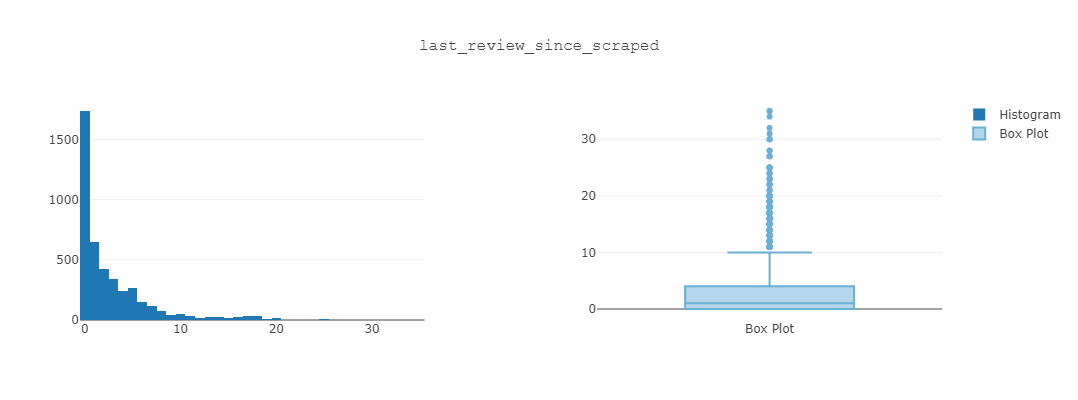

In [212]:
x = sorted(df.last_review_since_scraped.tolist())
layout = go.Layout(
    title = 'last_review_since_scraped',
    titlefont=dict(
            family='Courier New, monospace',
            size=16,
#             color='#7f7f7f'
        ),
    xaxis=dict(
        domain=[0, 0.4]
    ),
    xaxis2=dict(
        domain=[0.6, 1]
    ),
    yaxis2=dict(
        anchor='x2'
    ),
    autosize=False,
    width=800,
    height=400,
)

trace1 = go.Histogram(
    name='Histogram',
    x=x,
    xaxis='x1',
    yaxis='y1'
)

trace2 = go.Box(
    name='Box Plot',
    y=x,
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)'),
    xaxis='x2',
    yaxis='y2'
)

data = [trace1, trace2]
fig = go.Figure(data=data,layout=layout)
offline.iplot(fig)